In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')
df = insurance_df.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
df['children'] = df['children'].astype('category')

In [82]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [83]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [84]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

**Examine the distribution of Bmi**<br>
Histogram, sürekli değere sahip veriyi belli aralıklara böler ve o aralıklardaki veri sayısına göre çubuk yüksekliğini belirler. Grafikte görüldüğü üzere en çok veriye sahip aralık 25-30 aralığıdır.

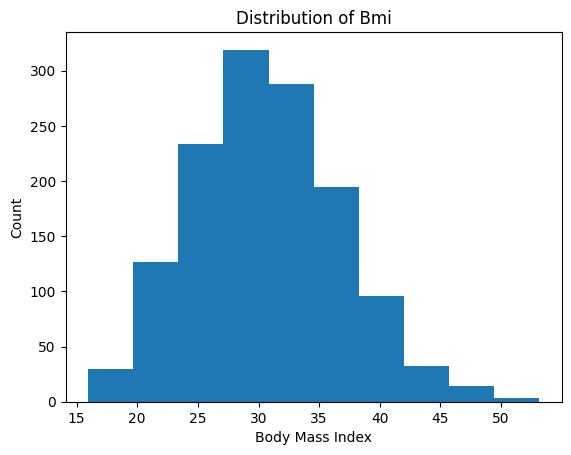

In [9]:
plt.hist(df['bmi'])
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of Bmi')
plt.show()

**Examine the relationship between “smoker” and “charges”**<br>
Grafikte sigara içenlerin sigara içmeyenlere göre genel olarak masraflarının daha yüksek olduğu görülmektedir.

<Axes: xlabel='smoker', ylabel='charges'>

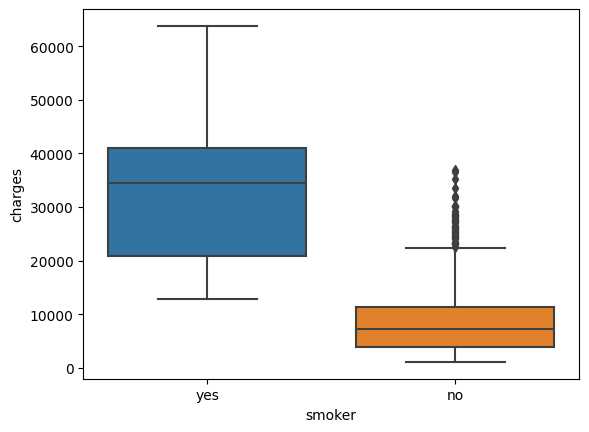

In [25]:
sns.boxplot(data=df, x='smoker', y='charges')

**Examine the relationship between “smoker” and “region”**<br>
Grafikte genel olarak hastaların sigara içmediği ve en çok sigara içen bölgenin ise güneydoğu olduğu görülmektedir.

<Axes: xlabel='region', ylabel='count'>

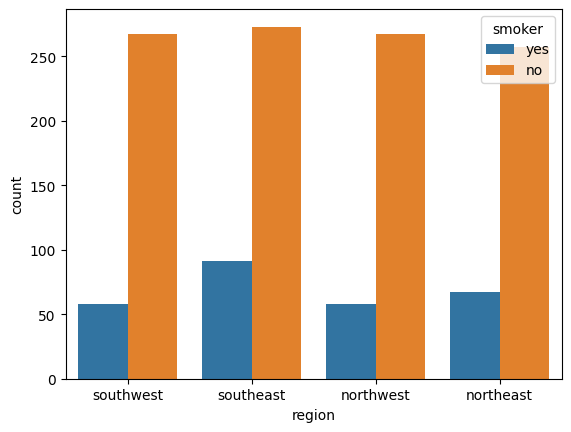

In [34]:
sns.countplot(data = df, x = 'region', hue = 'smoker')

**Examine the relationship between “bmi” and “sex”**<br>
Aykırı değerler olsa da genel olarak erkek ve kadınlarda bmi değerleri eşit aralıktadır.

<Axes: xlabel='sex', ylabel='bmi'>

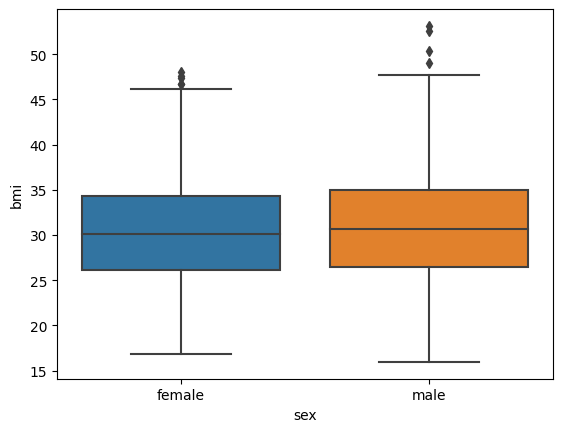

In [35]:
sns.boxplot(data=df, x='sex', y='bmi')

**Find the "region" with the most "children"**

In [60]:
df.groupby(df['region'])['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

**Examine the relationship between “age” and “bmi”**

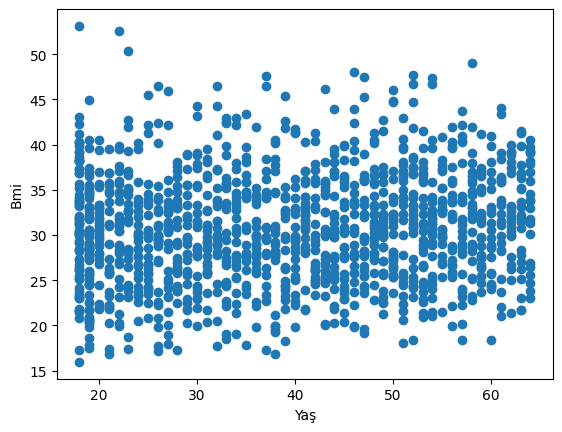

In [63]:
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Yaş')
plt.ylabel('Bmi')
plt.show()

**Examine the relationship between “bmi” and “children”**

<Axes: xlabel='children', ylabel='bmi'>

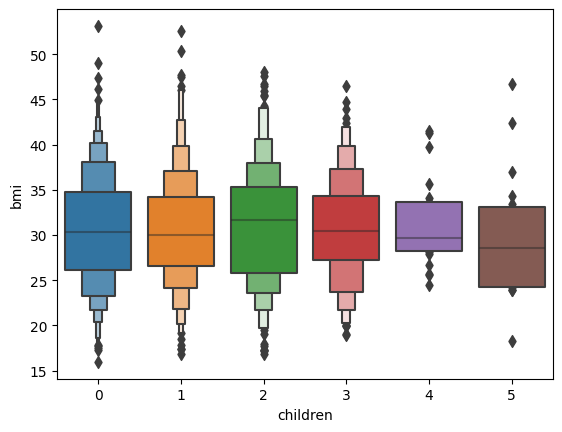

In [76]:
sns.boxenplot(data = df, x = 'children', y = 'bmi')

**Visualize Bmi outliers**<br>
Bmi değeri 45'ten büyük olan değerlerin outlier oludğu görülüyor.

<Axes: >

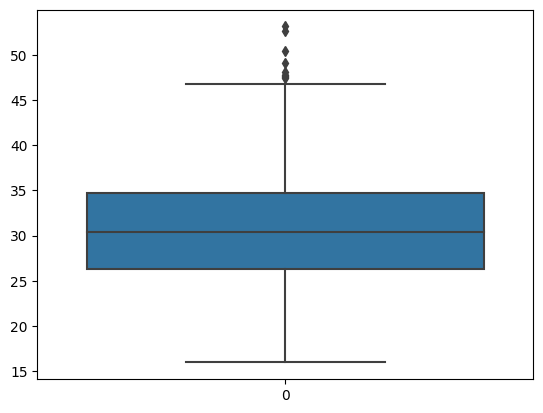

In [77]:
sns.boxplot(data=df['bmi'])

**Examine the relationship between “bmi” and “charges”**<br>
30'dan büyük vücut kitle indeksine sahip bazı hastalar için masraflarda artış görülüyor.

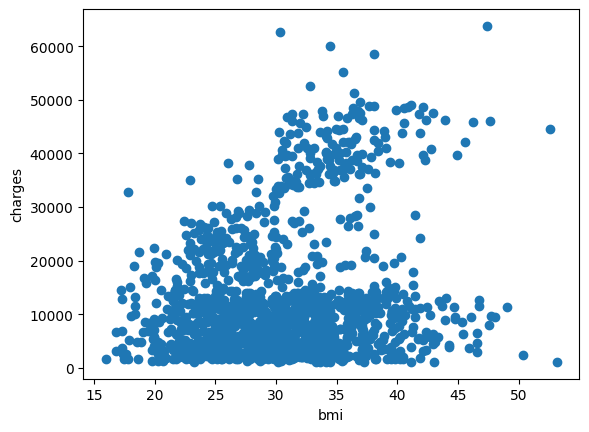

In [78]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

**Examine the relationship between “region”, “smoker” and “bmi” using bar plot**<br>
Sigaradan bağımsız olarak güneydoğu bölgesinin en büyük bmi değerlerine sahip olduğu görülüyor.

<Axes: xlabel='smoker', ylabel='bmi'>

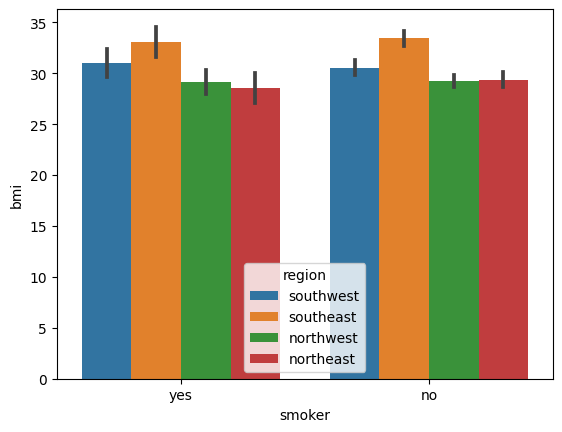

In [80]:
sns.barplot(x="smoker", y="bmi", hue="region",data=df)

# **Data Preprocessing**

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

lower bound:  13.7 	upper bound:  47.290000000000006


<Axes: xlabel='bmi'>

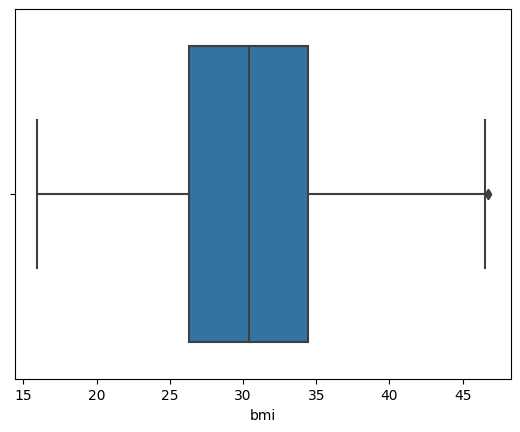

In [4]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
print("lower bound: ", lower_bound, "\tupper bound: ", upper_bound)
outliers_vector = (df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)
outliers = df['bmi'][outliers_vector]
outliers.index
df['bmi'][outliers_vector] = df['bmi'].mean()
sns.boxplot(x="bmi",data=df)

In [5]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [6]:
ohe = (OneHotEncoder(sparse_output=False).set_output(transform="pandas"))
region = ohe.fit_transform(df[['region']])
region.columns = ohe.get_feature_names_out()
region = region.drop(columns='region_southeast')
region.head()

,region_northeast,region_northwest,region_southwest
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [7]:
df = df.drop(columns='region')
df = pd.concat([df, region], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0


In [8]:
y = df.iloc[:, 5:6]
X = df.drop("charges",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test))
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southwest
995,0.456522,0.0,0.237577,0.6,0.0,1.0,0.0,0.0
92,0.891304,1.0,0.450471,0.6,1.0,1.0,0.0,0.0
1258,0.804348,1.0,0.706561,0.6,0.0,0.0,1.0,0.0
370,0.934783,0.0,0.166613,0.0,0.0,0.0,1.0,0.0
59,0.347826,0.0,0.694219,0.4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
959,0.652174,1.0,0.672621,0.2,0.0,0.0,1.0,0.0
1004,0.630435,1.0,0.104904,0.2,0.0,1.0,0.0,0.0
1057,0.586957,0.0,0.514128,0.0,0.0,0.0,0.0,0.0
951,0.717391,1.0,0.874959,0.4,1.0,0.0,0.0,0.0


# **Model Selection**

In [13]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

linear = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor()
mlp = MLPRegressor()

scores_linear = cross_val_score(linear, X, y, cv=5)
scores_ridge = cross_val_score(ridge, X, y, cv=5)
scores_rfr = cross_val_score(rfr, X, y, cv=5)
scores_mlp = cross_val_score(mlp, X, y, cv=5)

print("---cross_val_score---")
print("Linear: %0.2f accuracy with a standard deviation of %0.2f" % (scores_linear.mean(), scores_linear.std()))
print("Ridge: %0.2f accuracy with a standard deviation of %0.2f" % (scores_ridge.mean(), scores_ridge.std()))
print("RFR: %0.2f accuracy with a standard deviation of %0.2f" % (scores_rfr.mean(), scores_rfr.std()))
print("MLP: %0.2f accuracy with a standard deviation of %0.2f" % (scores_mlp.mean(), scores_mlp.std()))

linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

linear_pred = linear.predict(X_test)
ridge_pred = ridge.predict(X_test)
rfr_pred = rfr.predict(X_test)
mlp_pred = mlp.predict(X_test)

print("---r2---")
print("Linear: ", r2_score(y_test, linear_pred))
print("Ridge: ", r2_score(y_test, ridge_pred))
print("RFR: ", r2_score(y_test, rfr_pred))
print("MLP: ", r2_score(y_test, mlp_pred))

---cross_val_score---
Linear: 0.75 accuracy with a standard deviation of 0.02
Ridge: 0.75 accuracy with a standard deviation of 0.02
RFR: 0.83 accuracy with a standard deviation of 0.03
MLP: -0.00 accuracy with a standard deviation of 0.04
---r2---
Linear:  0.726407391476305
Ridge:  0.7263961715849742
RFR:  0.8325813803604253
MLP:  -1.108537614267536


# **Hyper-parameter Optimization**

In [15]:
from sklearn.model_selection import GridSearchCV

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth    = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf  = min number of data points allowed in a leaf node
# bootstrap         = method for sampling data points (with or without replacement)

forest_params = [{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}]
clf = GridSearchCV(rfr, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
0.8590918432268889


# **Model Evaluation**

In [17]:
from sklearn.metrics import mean_squared_error

optimized_rfr = RandomForestRegressor(
    bootstrap=clf.best_params_['bootstrap'],
    max_depth=clf.best_params_['max_depth'],
    max_features=clf.best_params_['max_features'],
    min_samples_leaf=clf.best_params_['min_samples_leaf'],
    min_samples_split=clf.best_params_['min_samples_split'],
    n_estimators=clf.best_params_['n_estimators']
)
optimized_rfr.fit(X_train, y_train)

print("R2: ", r2_score(y_test, optimized_rfr.predict(X_test)))
print("MSE: ", mean_squared_error(y_test, optimized_rfr.predict(X_test)))

R2:  0.8435705627738148
MSE:  24457369.633887723
